In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
import re
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [87]:
df1 = pd.read_csv("C:\\ESTERA\\CCT\\PROJECT\\Data sets\\Coffee shop sample data\\201904 sales reciepts.csv")
df1.head()

,transaction_id,transaction_date,Hours,Minutes,Seconds,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,01/04/2019,12,4,43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,01/04/2019,15,54,39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,01/04/2019,14,34,59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,01/04/2019,16,6,4,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,01/04/2019,19,18,37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   Hours             49894 non-null  int64  
 3   Minutes           49894 non-null  int64  
 4   Seconds           49894 non-null  int64  
 5   sales_outlet_id   49894 non-null  int64  
 6   staff_id          49894 non-null  int64  
 7   customer_id       49894 non-null  int64  
 8   instore_yn        49894 non-null  object 
 9   order             49894 non-null  int64  
 10  line_item_id      49894 non-null  int64  
 11  product_id        49894 non-null  int64  
 12  quantity          49894 non-null  int64  
 13  line_item_amount  49894 non-null  float64
 14  unit_price        49894 non-null  float64
 15  promo_item_yn     49894 non-null  object 
dtypes: float64(2), int64(11), object(3)
memo

In [89]:
df2 = pd.read_csv("C:\\ESTERA\\CCT\\PROJECT\\Data sets\\Coffee shop sample data\\customer.csv")
df2.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,04/01/2017,908-424-2890,29/05/1950,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,07/01/2017,032-732-6308,30/07/1950,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,10/01/2017,459-375-9187,30/09/1950,M,1950
3,4,3,Rafael Estes,Ina@non.gov,13/01/2017,576-640-9226,01/12/1950,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,15/01/2017,344-674-6569,01/02/1951,M,1951


In [159]:
df = pd.merge(df1, df2, on='customer_id')
df.head()

,transaction_id,transaction_date,Hours,Minutes,Seconds,sales_outlet_id,staff_id,customer_id,instore_yn,order,...,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,7,01/04/2019,12,4,43,3,12,558,N,1,...,2.50,N,3,Melissa Johnson,Luke@eget.net,19/06/2018,816-924-9433,25/02/1983,F,1983
1,1539,01/04/2019,16,49,47,3,12,558,N,1,...,2.50,N,3,Melissa Johnson,Luke@eget.net,19/06/2018,816-924-9433,25/02/1983,F,1983
2,2188,01/04/2019,15,1,2,3,17,558,Y,1,...,2.50,N,3,Melissa Johnson,Luke@eget.net,19/06/2018,816-924-9433,25/02/1983,F,1983
3,78,02/04/2019,15,24,16,3,17,558,N,1,...,3.75,N,3,Melissa Johnson,Luke@eget.net,19/06/2018,816-924-9433,25/02/1983,F,1983
4,14,03/04/2019,19,45,56,3,12,558,N,1,...,3.00,N,3,Melissa Johnson,Luke@eget.net,19/06/2018,816-924-9433,25/02/1983,F,1983


# EDA

In [116]:
#df.isnull().sum()

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24852 entries, 0 to 24851
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       24852 non-null  int64  
 1   transaction_date     24852 non-null  object 
 2   Hours                24852 non-null  int64  
 3   Minutes              24852 non-null  int64  
 4   Seconds              24852 non-null  int64  
 5   sales_outlet_id      24852 non-null  int64  
 6   staff_id             24852 non-null  int64  
 7   customer_id          24852 non-null  int64  
 8   instore_yn           24852 non-null  object 
 9   order                24852 non-null  int64  
 10  line_item_id         24852 non-null  int64  
 11  product_id           24852 non-null  int64  
 12  quantity             24852 non-null  int64  
 13  line_item_amount     24852 non-null  float64
 14  unit_price           24852 non-null  float64
 15  promo_item_yn        24852 non-null 

### Data transformation

In [160]:
# Gender maping
gender_mapping = {'F': 1, 'M': 0}
df['gender'] = df['gender'].map(gender_mapping)

YN_mapping = {'Y': 1, 'N': 0}
df['promo_item_yn'] = df['promo_item_yn'].map(YN_mapping)
df['instore_yn'] = df['instore_yn'].map(YN_mapping)

df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d/%m/%Y')
df['birthdate'] = pd.to_datetime(df['birthdate'], format='%d/%m/%Y')
df['customer_since'] = pd.to_datetime(df['customer_since'], format='%d/%m/%Y')

In [148]:
df.head()

,transaction_id,transaction_date,Hours,Minutes,Seconds,sales_outlet_id,staff_id,customer_id,instore_yn,order,...,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,7,2019-04-01,12,4,43,3,12,558,0.0,1,...,2.50,0,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,1.0,1983
1,1539,2019-04-01,16,49,47,3,12,558,0.0,1,...,2.50,0,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,1.0,1983
2,2188,2019-04-01,15,1,2,3,17,558,1.0,1,...,2.50,0,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,1.0,1983
3,78,2019-04-02,15,24,16,3,17,558,0.0,1,...,3.75,0,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,1.0,1983
4,14,2019-04-03,19,45,56,3,12,558,0.0,1,...,3.00,0,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,1.0,1983


In [161]:
columns_to_drop = ['customer_first-name', 'customer_email', 'loyalty_card_number']
df = df.drop(columns=columns_to_drop)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24852 entries, 0 to 24851
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    24852 non-null  int64         
 1   transaction_date  24852 non-null  datetime64[ns]
 2   Hours             24852 non-null  int64         
 3   Minutes           24852 non-null  int64         
 4   Seconds           24852 non-null  int64         
 5   sales_outlet_id   24852 non-null  int64         
 6   staff_id          24852 non-null  int64         
 7   customer_id       24852 non-null  int64         
 8   instore_yn        24809 non-null  float64       
 9   order             24852 non-null  int64         
 10  line_item_id      24852 non-null  int64         
 11  product_id        24852 non-null  int64         
 12  quantity          24852 non-null  int64         
 13  line_item_amount  24852 non-null  float64       
 14  unit_price        2485

In [151]:
#sns.pairplot(df)
#plt.show()


KeyboardInterrupt



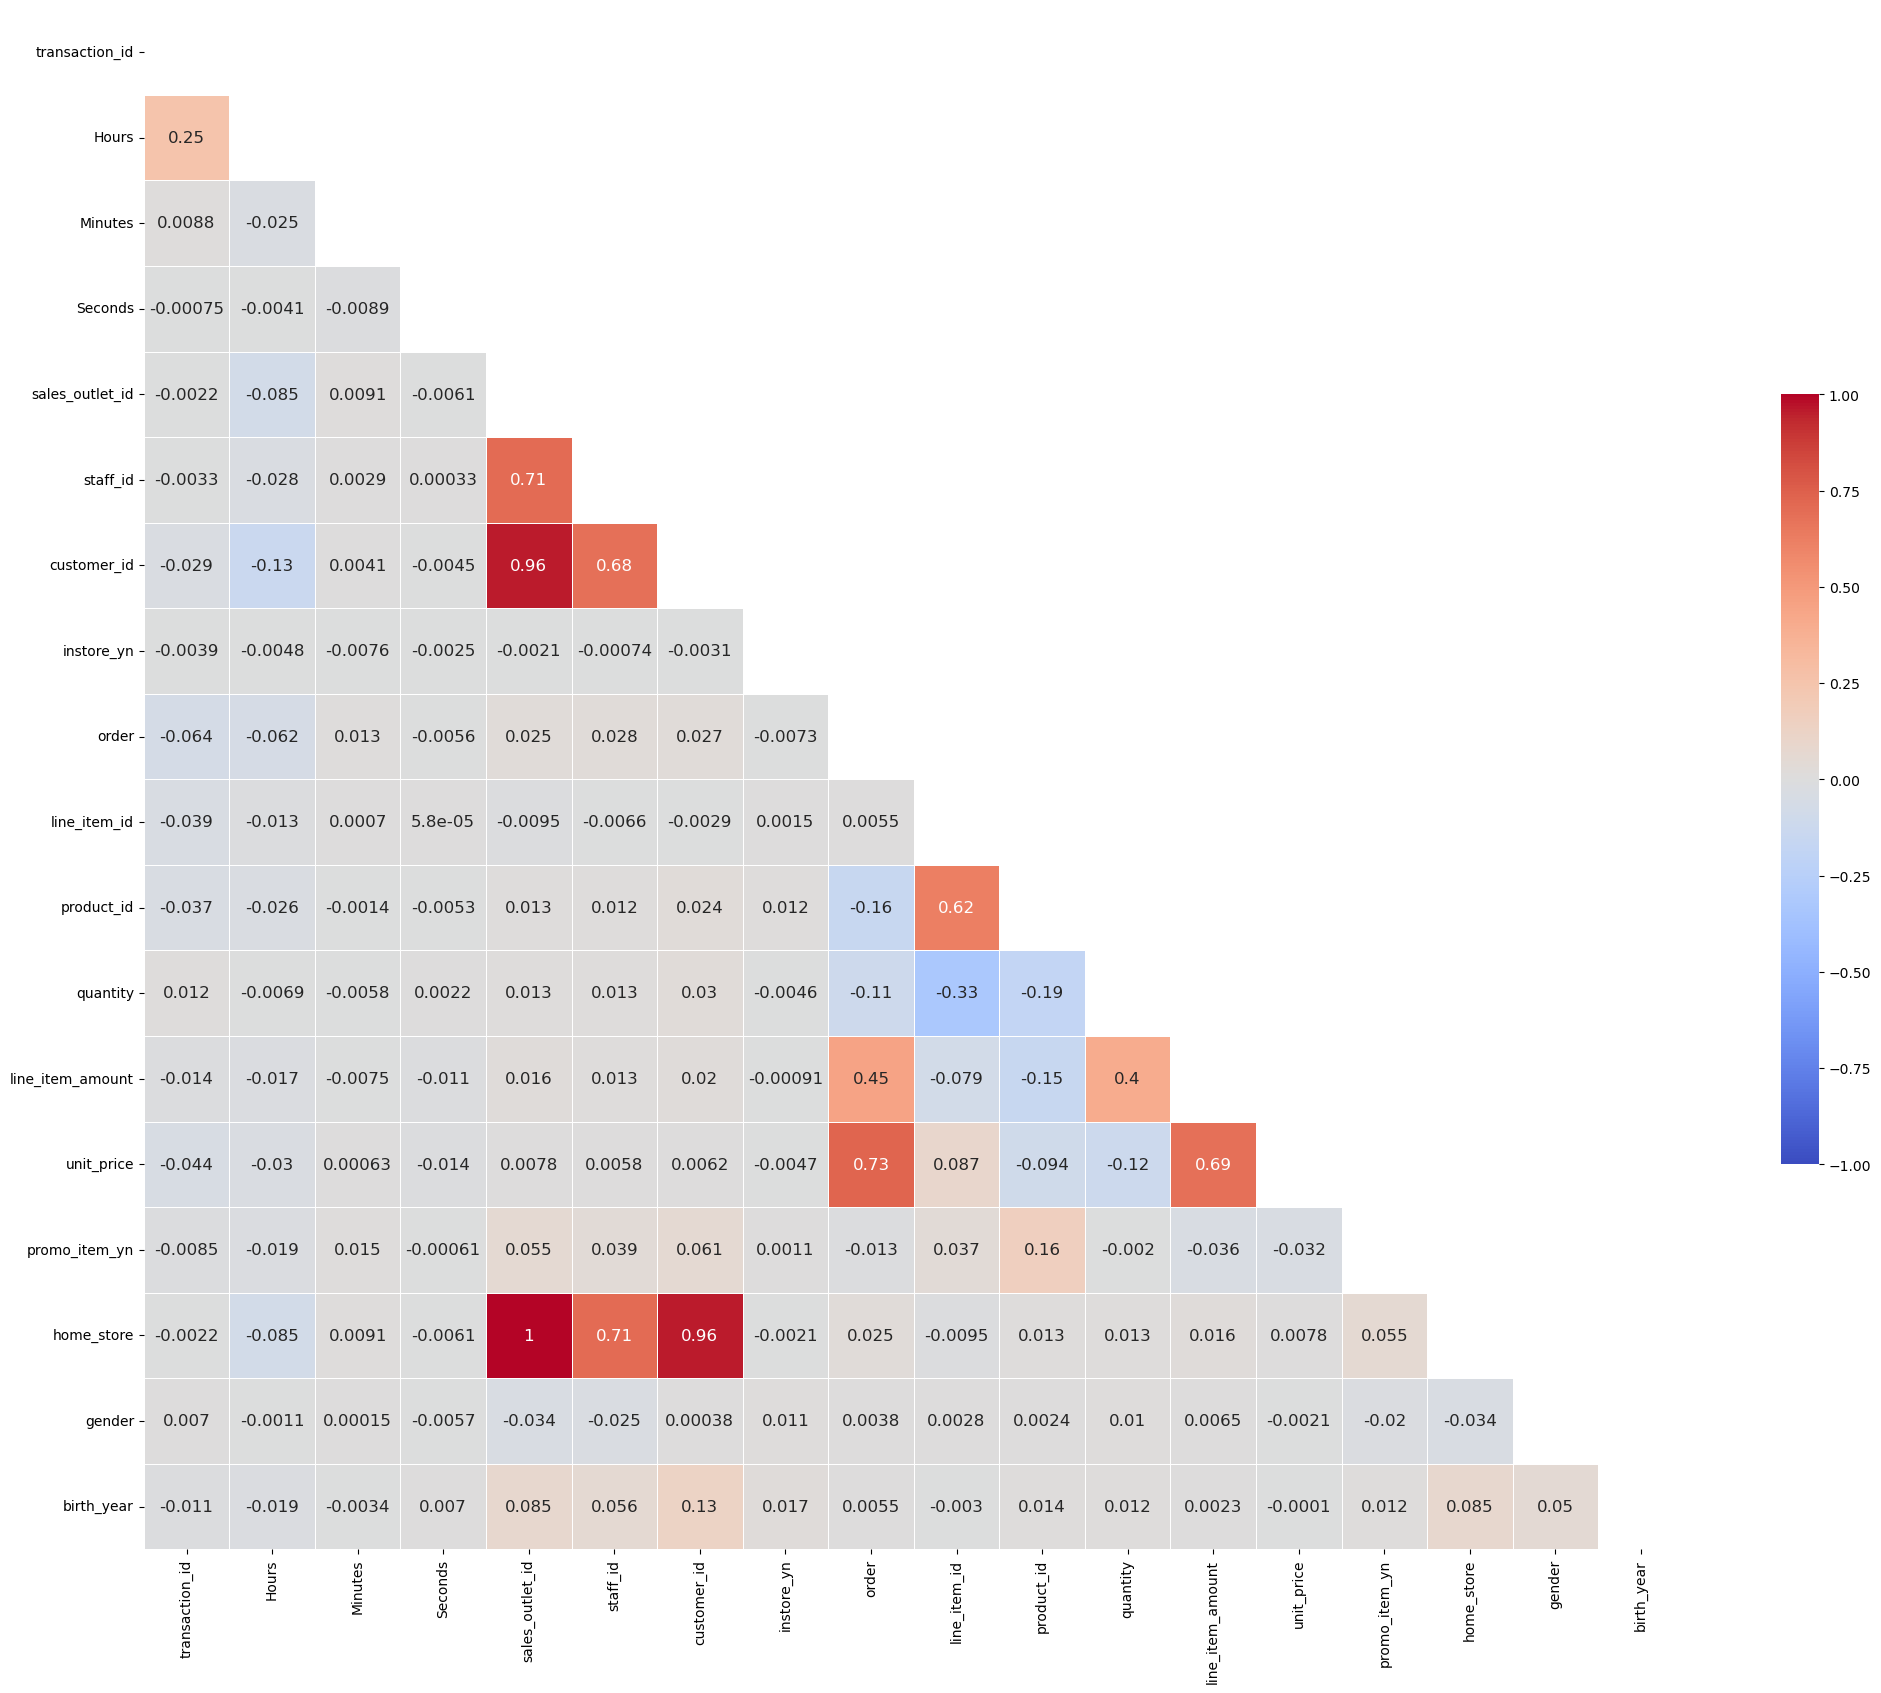

In [127]:
# plotig a heatmap to see a correlation between variables
#corrmat = df.corr()

# setting mask for upper triangle
#mask = np.triu(np.ones_like(corrmat, dtype=bool))

# setting colour scheme:  hot-cold 
# cmap = sns.diverging_palette(240, 15, as_cmap=True)
#cmap = 'coolwarm'

#plotting graph
#f, ax = plt.subplots(figsize=(25, 20))
#sns.heatmap(corrmat, square = True, mask=mask, cmap=cmap,
            vmax=1, vmin=-1, center=0,
            annot = True, annot_kws = {'size': 12},
            linewidths=.5, cbar_kws={"shrink": .5})
#plt.show()

In [162]:
transaction_counts = df.groupby('transaction_id').size().reset_index(name='row_count')

In [163]:
transaction_counts

,transaction_id,row_count
0,1,33
1,2,31
2,3,30
3,4,32
4,5,32
...,...,...
3252,4184,1
3253,4188,1
3254,4191,1
3255,4200,1


In [164]:
filtered_transaction_counts = transaction_counts[transaction_counts['row_count'] >= 2]
filtered_transaction_counts

,transaction_id,row_count
0,1,33
1,2,31
2,3,30
3,4,32
4,5,32
...,...,...
3219,4073,2
3233,4105,2
3240,4124,2
3243,4135,2


#### There are very small percentage of single item bought

In [135]:
import plotly.express as px

fig = px.histogram(transaction_counts, x='row_count', title='Frequency of Multiple-Item Transactions')
fig.update_layout(
    xaxis_title='Number of Items in Transaction',
    yaxis_title='Frequency',
    bargap=0.1  # Adjust the gap between bars
)
fig.show()

## Customer segmentation

In [165]:
from datetime import datetime

# Calculate age
current_year = datetime.now().year
df['age'] = current_year - df['birthdate'].dt.year

# Create age groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Adjust the age groups as needed
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [166]:
df.head()

,transaction_id,transaction_date,Hours,Minutes,Seconds,sales_outlet_id,staff_id,customer_id,instore_yn,order,...,line_item_amount,unit_price,promo_item_yn,home_store,customer_since,birthdate,gender,birth_year,age,age_group
0,7,2019-04-01,12,4,43,3,12,558,0.0,1,...,2.50,2.50,0,3,2018-06-19,1983-02-25,1.0,1983,40,36-45
1,1539,2019-04-01,16,49,47,3,12,558,0.0,1,...,2.50,2.50,0,3,2018-06-19,1983-02-25,1.0,1983,40,36-45
2,2188,2019-04-01,15,1,2,3,17,558,1.0,1,...,5.00,2.50,0,3,2018-06-19,1983-02-25,1.0,1983,40,36-45
3,78,2019-04-02,15,24,16,3,17,558,0.0,1,...,3.75,3.75,0,3,2018-06-19,1983-02-25,1.0,1983,40,36-45
4,14,2019-04-03,19,45,56,3,12,558,0.0,1,...,3.00,3.00,0,3,2018-06-19,1983-02-25,1.0,1983,40,36-45


In [167]:
# Segment by gender, age group, and order size
segmented_df = df.groupby(['gender', 'age_group', 'order']).size().reset_index(name='customer_count')

In [176]:
# Create a copy of the original DataFrame
df_copy = df.copy()

# Convert numeric gender values to strings
df_copy['gender'] = df_copy['gender'].map({0: 'Male', 1: 'Female'})

# Group by age group and gender, and count the number of orders in each group
segmented_df = df_copy.groupby(['age_group', 'gender'])['order'].count().reset_index(name='order_count')

# Display the result
print(segmented_df)

   age_group  gender  order_count
0       0-18  Female            0
1       0-18    Male            0
2      19-25  Female          578
3      19-25    Male          241
4      26-35  Female         2185
5      26-35    Male         1586
6      36-45  Female         2126
7      36-45    Male         1595
8      46-55  Female         2013
9      46-55    Male         1477
10     56-65  Female         2155
11     56-65    Male         1779
12       66+  Female         1794
13       66+    Male         1544


In [182]:

# Define the order of age groups
age_group_order = sorted(segmented_df['age_group'].unique())

# Create a horizontal bar chart using Plotly Express
fig = px.bar(segmented_df, x='order_count', y='age_group', color='gender',
             orientation='h', barmode='group',
             color_discrete_map={'Female': 'lightcoral', 'Male': 'cornflowerblue'},
             category_orders={'age_group': age_group_order})

# Set axis labels and chart title
fig.update_layout(title='Order Count by Age Group and Gender',
                  xaxis_title='Order Count',
                  yaxis_title='Age Group')

# Show the plot
fig.show()

### How many items were bought per each group

In [185]:
df_items = df.copy()

# Convert numeric gender values to strings
df_items['gender'] = df_items['gender'].map({0: 'Male', 1: 'Female'})

# Group by age group and gender, and sum the quantity of items in each group
items_by_group = df_items.groupby(['age_group', 'gender'])['quantity'].sum().reset_index(name='item_count')

# Display the calculated values as a DataFrame
print(items_by_group)

   age_group  gender  item_count
0       0-18  Female           0
1       0-18    Male           0
2      19-25  Female         845
3      19-25    Male         343
4      26-35  Female        3140
5      26-35    Male        2244
6      36-45  Female        3033
7      36-45    Male        2251
8      46-55  Female        2895
9      46-55    Male        2119
10     56-65  Female        3129
11     56-65    Male        2589
12       66+  Female        2536
13       66+    Male        2171


In [184]:
df_items = df.copy()

# Convert numeric gender values to strings
df_items['gender'] = df_items['gender'].map({0: 'Male', 1: 'Female'})

# Group by age group and gender, and sum the quantity of items in each group
items_by_group = df_items.groupby(['age_group', 'gender'])['quantity'].sum().reset_index(name='item_count')

# Create an interactive horizontal bar chart using Plotly Express
fig = px.bar(items_by_group, x='item_count', y='age_group', color='gender',
             orientation='h', barmode='group',
             color_discrete_map={'Female': 'lightcoral', 'Male': 'cornflowerblue'},
             category_orders={'age_group': sorted(items_by_group['age_group'].unique())},
             labels={'item_count': 'Item Count', 'age_group': 'Age Group'})

# Set chart title
fig.update_layout(title='Item Count by Age Group and Gender')

# Show the plot
fig.show()

### Number of items vs number of orders per each group

In [186]:
# Merge the DataFrames on 'age_group' and 'gender'
order_vs_items = pd.merge(segmented_df, items_by_group, on=['age_group', 'gender'], how='left')

# Display the merged DataFrame
print(order_vs_items)

   age_group  gender  order_count  item_count
0       0-18  Female            0           0
1       0-18    Male            0           0
2      19-25  Female          578         845
3      19-25    Male          241         343
4      26-35  Female         2185        3140
5      26-35    Male         1586        2244
6      36-45  Female         2126        3033
7      36-45    Male         1595        2251
8      46-55  Female         2013        2895
9      46-55    Male         1477        2119
10     56-65  Female         2155        3129
11     56-65    Male         1779        2589
12       66+  Female         1794        2536
13       66+    Male         1544        2171


In [188]:
# Calculate the ratio of item_count to order_count
order_vs_items['item_order_ratio'] = order_vs_items['item_count'] / order_vs_items['order_count']

# Display the updated DataFrame
print(order_vs_items)

   age_group  gender  order_count  item_count  item_order_ratio
0       0-18  Female            0           0               NaN
1       0-18    Male            0           0               NaN
2      19-25  Female          578         845          1.461938
3      19-25    Male          241         343          1.423237
4      26-35  Female         2185        3140          1.437071
5      26-35    Male         1586        2244          1.414880
6      36-45  Female         2126        3033          1.426623
7      36-45    Male         1595        2251          1.411285
8      46-55  Female         2013        2895          1.438152
9      46-55    Male         1477        2119          1.434665
10     56-65  Female         2155        3129          1.451972
11     56-65    Male         1779        2589          1.455312
12       66+  Female         1794        2536          1.413601
13       66+    Male         1544        2171          1.406088
